In [1]:
import pandas as pd 
import numpy as np
from nltk.tokenize import word_tokenize 

#plot Grafik
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
df = pd.read_csv("data_clean.csv")

df

,userName,score,at,content,label,content_tokenize,content_normalized,content_stop_removed,content_Stemmed
0,Robbi Eko,5,2023-03-30 14:37:38,sip terima kasih,positif,"['sip', 'terima', 'kasih']","['sip', 'terima', 'kasih']","['sip', 'terima', 'kasih']","['sip', 'terima', 'kasih']"
1,mimi cedar,5,2023-03-30 14:35:59,bagaimana cara transfer sesama gopay gopay say...,positif,"['bagaimana', 'cara', 'transfer', 'sesama', 'g...","['bagaimana', 'cara', 'transfer', 'sesama', 'g...","['transfer', 'gopay', 'gopay', 'transfer', 'go...","['transfer', 'gopay', 'gopay', 'transfer', 'go..."
2,Elisabeth Kiswati Ladiyo,5,2023-03-30 14:33:41,amandan cepat sesuai dengan ekspektasi,positif,"['amandan', 'cepat', 'sesuai', 'dengan', 'eksp...","['amandan', 'cepat', 'sesuai', 'dengan', 'eksp...","['amandan', 'cepat', 'sesuai', 'ekspektasi']","['amandan', 'cepat', 'sesuai', 'ekspektasi']"
3,Jemmi Meliau ibanez,5,2023-03-30 14:23:25,aplikasi yang cukup membantu,positif,"['aplikasi', 'yang', 'cukup', 'membantu']","['aplikasi', 'yang', 'cukup', 'membantu']","['aplikasi', 'membantu']","['aplikasi', 'bantu']"
4,Boedi Arsih,5,2023-03-30 14:19:13,cepet sampainya,positif,"['cepet', 'sampainya']","['cepat', 'sampainya']","['cepat', 'sampainya']","['cepat', 'sampai']"
...,...,...,...,...,...,...,...,...,...
19150,NS P,5,2023-01-08 15:30:18,tolong di peringan app nya suka ngelag,positif,"['tolong', 'di', 'peringan', 'app', 'nya', 'su...","['tolong', 'di', 'peringan', 'app', 'nya', 'su...","['tolong', 'peringan', 'app', 'nya', 'suka', '...","['tolong', 'pering', 'app', 'nya', 'suka', 'ng..."
19151,EGA ARDANA,1,2023-01-08 15:29:57,gman nih gw mau upgrade gopay dh puluhan kali ...,negatif,"['gman', 'nih', 'gw', 'mau', 'upgrade', 'gopay...","['gman', 'nih', 'gue', 'mau', 'upgrade', 'gopa...","['gman', 'nih', 'gue', 'upgrade', 'gopay', 'de...","['gman', 'nih', 'gue', 'upgrade', 'gopay', 'de..."
19152,Andre Jayaramadhan,1,2023-01-08 15:27:11,perbaiki lagi apk nya mau to up gopay aja nung...,negatif,"['perbaiki', 'lagi', 'apk', 'nya', 'mau', 'to'...","['perbaiki', 'lagi', 'apk', 'nya', 'mau', 'tap...","['perbaiki', 'apk', 'nya', 'up', 'gopay', 'men...","['baik', 'apk', 'nya', 'up', 'gopay', 'tunggu'..."
19153,Angga Dian,5,2023-01-08 15:20:19,mantaap,positif,['mantaap'],['mantap'],['mantap'],['mantap']


In [ ]:
df["content_clean"] = [' '.join(map(str, l)) for l in df['content_Stemmed']]

In [ ]:
content = ' '.join(str(v) for v in df['content_clean'])

df

In [ ]:
tokenize_content = word_tokenize(content)

In [ ]:
tokenize_content

In [3]:
import ast

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])
df['content_Stemmed'] = df['content_Stemmed'].apply(join_text_list)

df['content_Stemmed'].head()

0                       sip terima kasih
1    transfer gopay gopay transfer gopay
2        amandan cepat sesuai ekspektasi
3                         aplikasi bantu
4                           cepat sampai
Name: content_Stemmed, dtype: object

In [4]:
positif = df.loc[df['label'] == 'positif'] 
negatif = df.loc[df['label'] == 'negatif']

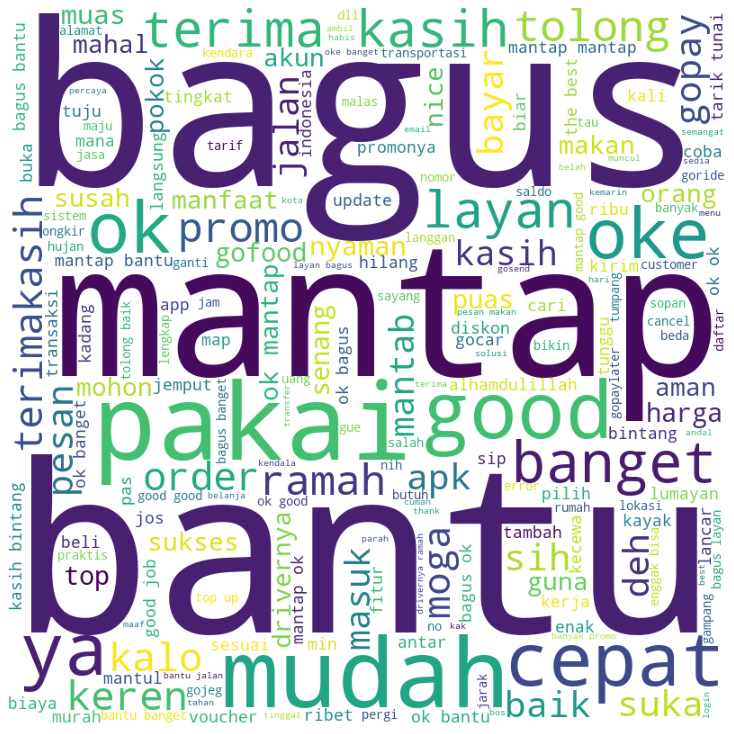

In [7]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

#Define a list of stop words
stopwords = ['gojek', 'nya', 'driver', 'aplikasi', 'skip', 'bagu']

wordcloud = WordCloud(width = 800, height = 800,
                     background_color = 'white',
                     stopwords=stopwords,
                     random_state=42).generate_from_text(' '.join(positif['content_Stemmed']))

plt.figure(figsize = (10,10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

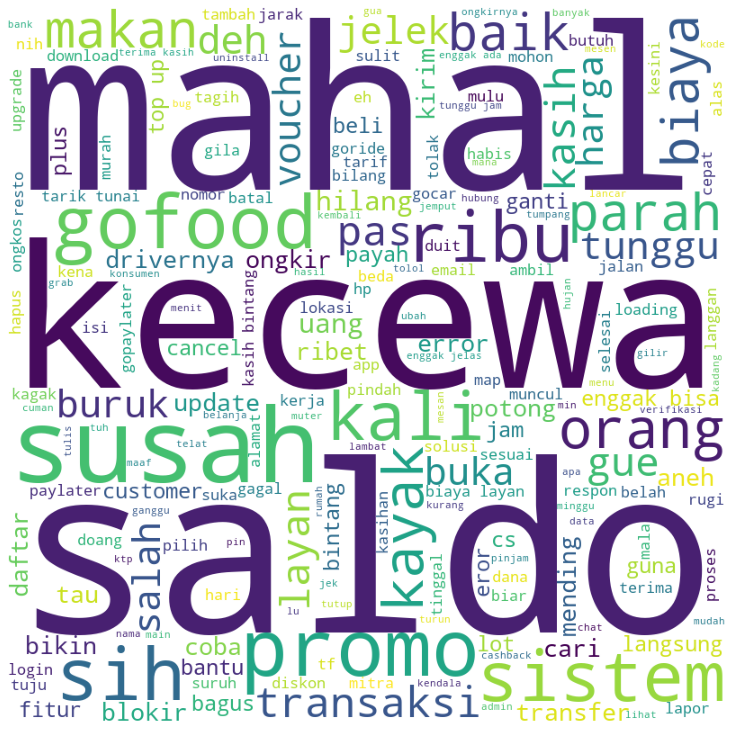

In [13]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

#Define a list of stop words
stopwords = ['gojek', 'nya', 'driver', 'aplikasi', 'pakai', 'ya', 'gopay', 'kalo', 'bayar', 'kalo', 'akun', 'order', 'banget',
            'tolong', 'pesan', 'masuk', 'apk']

wordcloud = WordCloud(width = 800, height = 800,
                     background_color = 'white',
                     stopwords=stopwords,
                     random_state=42).generate_from_text(' '.join(negatif['content_Stemmed']))

plt.figure(figsize = (10,10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()